0.9995108712957717


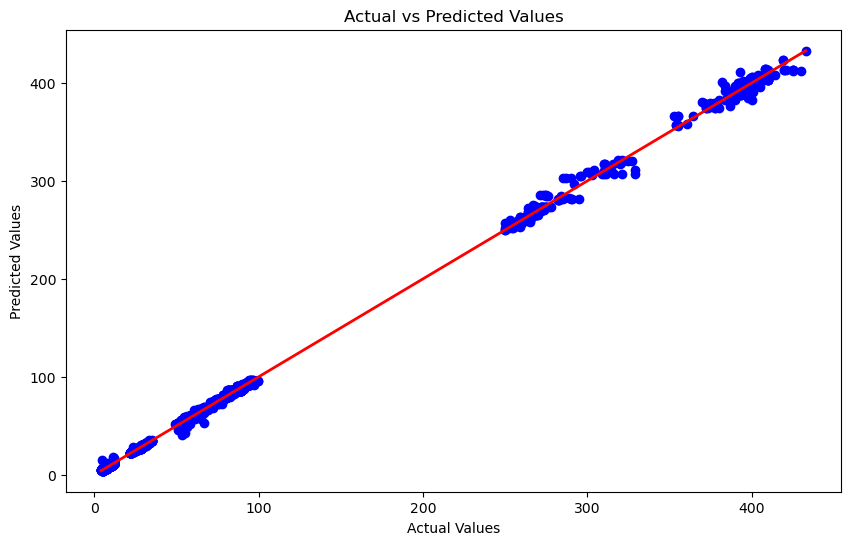

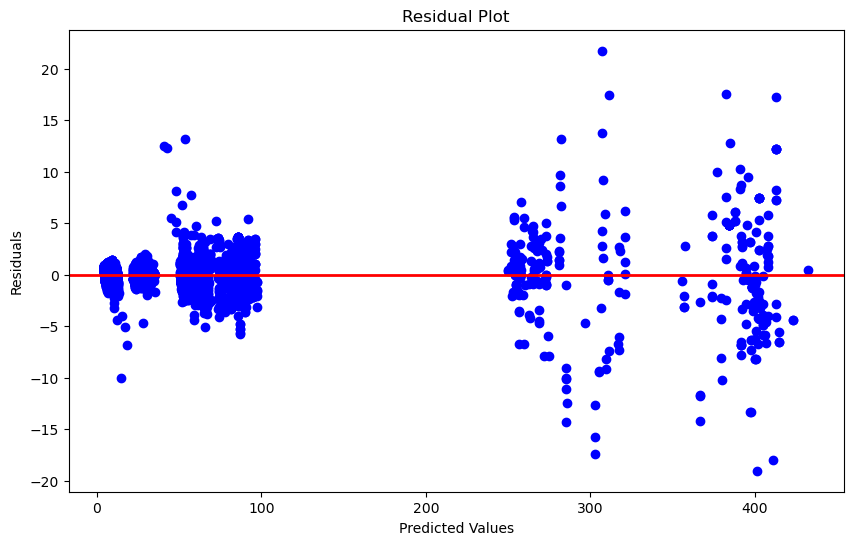

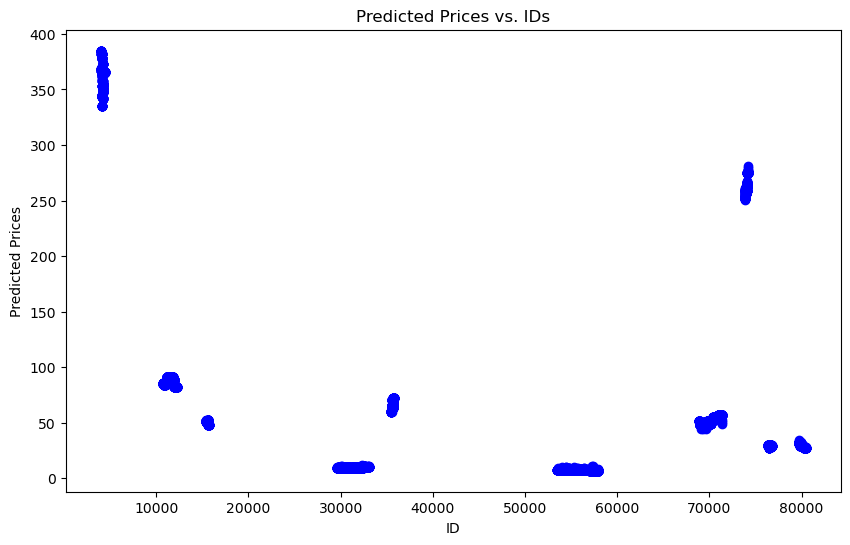

In [5]:
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

dataset = pd.read_csv('train.csv')
X = dataset.iloc[:, [1, 4, 5, 6, 7]].values
Y = dataset.iloc[:, 3].values

# DATA PREPROCESSING
X[:,2] = pd.to_datetime(X[:,2])

# Convert datetime to float (Unix timestamp)
X[:, 2] = [timestamp.timestamp() for timestamp in X[:, 2]]


# Converting alphabetical data to numerical data
scrip = ColumnTransformer([("Scrip", OneHotEncoder(), [0])], remainder='passthrough')
X = scrip.fit_transform(X)
X = X[: , 0:]

# Convert the entire array to float
X = X.astype(float)

# Generate polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, Y, test_size = 0.1, random_state = 0)

# Fitting Polynomial Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting
y_pred = regressor.predict(X_test)

R_square = regressor.score(X_test , y_test)
print(R_square)

# Load test dataset
test_dataset = pd.read_csv('test.csv')
X2_test = test_dataset.iloc[:, [1, 3, 4, 5, 6]].values  # Adjust column indices since there's no Price column

# DATA PREPROCESSING
X2_test[:, 2] = pd.to_datetime(X2_test[:, 2])

# Convert datetime to float (Unix timestamp)
X2_test[:, 2] = [timestamp.timestamp() for timestamp in X2_test[:, 2]]

# Converting alphabetical data to numerical data
X2_test = scrip.fit_transform(X2_test)

# Convert the entire array to float
X2_test = X2_test.astype(float)

# Generate polynomial features for test data
X2_test_poly = poly.transform(X2_test)

# Predicting prices for the test data
y_pred_test = regressor.predict(X2_test_poly)

# Printing predicted prices for the test data along with IDs
ids = test_dataset.iloc[:, 0].values  # Assuming the first column contains IDs
results_df = pd.DataFrame({'ID': ids, 'Price': y_pred_test})
# Print or save results_df as needed


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()


# # Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue')
plt.axhline(y=0, color='red', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()



# # Predicted prices vs. IDs for the test dataset
plt.figure(figsize=(10, 6))
plt.scatter(ids, y_pred_test, color='blue')
plt.xlabel('ID')
plt.ylabel('Predicted Prices')
plt.title('Predicted Prices vs. IDs')
plt.show()